<a href="https://colab.research.google.com/github/Mozun1/data-analysis/blob/main/%D8%A7%D9%84%D8%AA%D8%AD%D9%88%D9%84_%D8%A7%D9%84%D8%B1%D9%82%D9%85%D9%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

استدعاء المكتبات المطلوبة

In [36]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
!pip install kagglehub


In [16]:
import kagglehub

# تحميل dataset
path = kagglehub.dataset_download("vikasjigupta786/customer-analytics-practice-dataset")

print(" Path to dataset files:", path)


 Path to dataset files: /kaggle/input/customer-analytics-practice-dataset


In [17]:
import os
# file name
print(os.listdir(path))


['Mall_Customers_Enhanced.csv']


In [21]:

csv_file = os.path.join(path, "Mall_Customers_Enhanced.csv")
#df = dataFrame : يخزن البيانات في جدول قابل للتحليل والقراءة والمعالجة
df = pd.read_csv(csv_file)
# frist 5
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age Group  Estimated Savings (k$)  Credit Score  Loyalty Years  \
0     18-25                   11.10           456              3   
1     18-25                    6.90           300              6   
2     18-25                   15.36           594              2   
3     18-25                    7.79           300              6   
4     26-35                   12.47           480              5   

  Preferred Category  
0             Budget  
1             Luxury  
2             Budget  
3             Luxury  
4             Budget  


استعراض عناوين الاعمدة

In [22]:
print(df.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age Group', 'Estimated Savings (k$)',
       'Credit Score', 'Loyalty Years', 'Preferred Category'],
      dtype='object')


# استعراض الفئة الاكثر انفاقاً يساعد في تحليل السلوك الشرائي ومعرفة الفئة الانسب للاستهداف


عدد العملاء حسب الفئة:
Gender
Female    112
Male       88
Name: count, dtype: int64


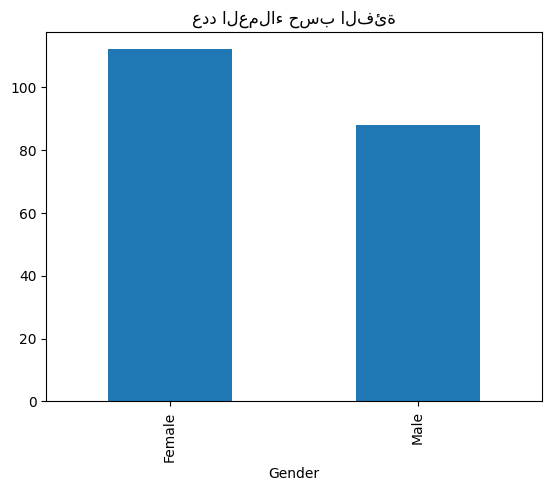

In [43]:
# 1 توزيع الفئة (Gender)
gender_counts = df['Gender'].value_counts()
print("\nعدد العملاء حسب الفئة:")
print(gender_counts)

gender_counts.plot(kind="bar", title="عدد العملاء حسب الفئة")
plt.show()

# استعراض متوسط الدخل مع الفئة العمرية وغالباً بسبب اهداف تسويقية ويساعد في تحسين تجربة العميل

متوسط الدخل حسب الفئة العمرية
Age Group
18-25    45.029412
26-35    68.150000
36-50    66.661290
51-65    54.892857
65+      51.416667
Name: Annual Income (k$), dtype: float64


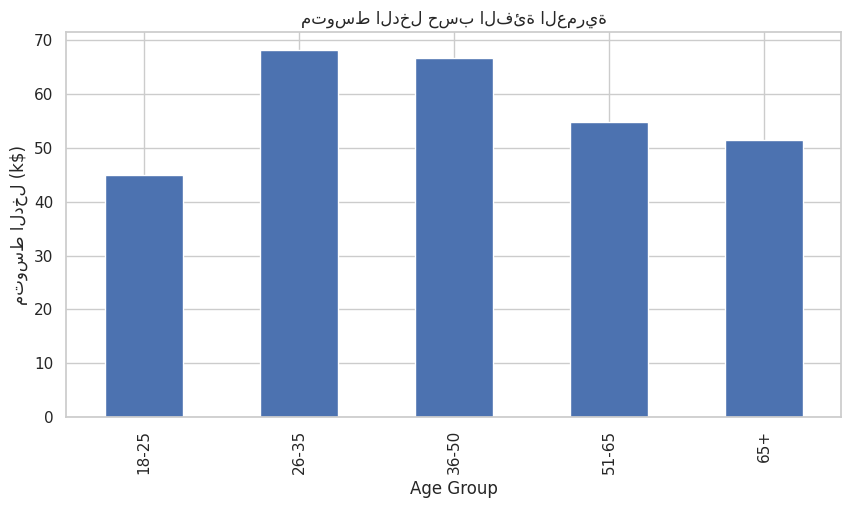

In [50]:
# 2. متوسط الدخل حسب الفئة العمرية Age Group
# رسم شريطي
# k$ = الف دولار
income_by_age = df.groupby("Age Group")["Annual Income (k$)"].mean()
print("متوسط الدخل حسب الفئة العمرية")
print(income_by_age)
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
income_by_age.plot(kind="bar", title="متوسط الدخل حسب الفئة العمرية")
plt.ylabel("متوسط الدخل (k$)")
plt.show()

# يٌظهر الفئات الاكثر والاقل صرفاً مع دخلهم

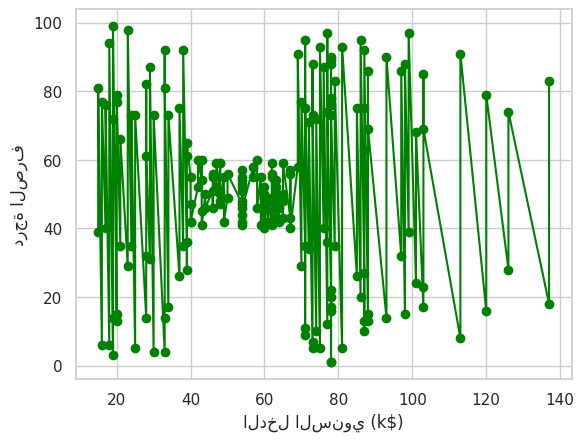

In [52]:
#3. ترتيب البيانات حسب الدخل

df_sorted = df.sort_values("Annual Income (k$)")
plt.plot(df_sorted["Annual Income (k$)"], df_sorted["Spending Score (1-100)"], marker='o', linestyle='-', color='green')

plt.xlabel("الدخل السنوي (k$)")
plt.ylabel("درجة الصرف")
plt.show()



#استهداف العملاء المميزين ضمن استراتيجية التحول الرقمي






:عدد العملاء حسب سنوات الولاء
Loyalty Years
2     4
3     8
4    26
5    36
6    53
7    42
8    21
9    10
Name: CustomerID, dtype: int64


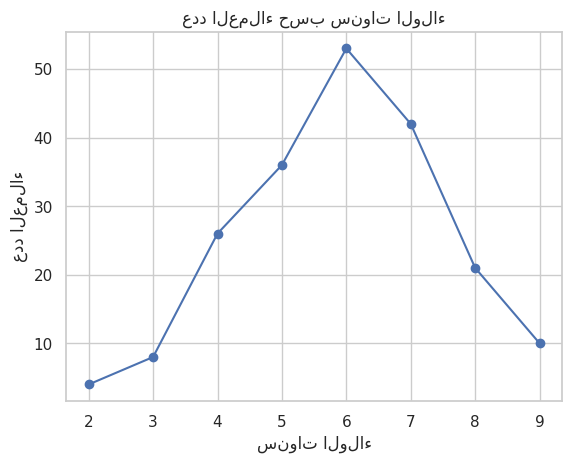

In [56]:
# 4. ولاء العملاء حسب عدد السنوات
# رسم خطي
loyalty = df.groupby("Loyalty Years")["CustomerID"].count()
print("\n:عدد العملاء حسب سنوات الولاء")
print(loyalty)
sns.set(style="whitegrid")

loyalty.plot(kind="line", marker="o", title="عدد العملاء حسب سنوات الولاء")
plt.ylabel("عدد العملاء")
plt.xlabel("سنوات الولاء")
plt.show()


# الفئات من الاكثر الى الاقل

*   يساعد في معرفة الاكثر استهلاكاًو يساعد في اتخاذ القرارات
*   ممكن يستخدم في نماذج التنبؤ




الفئات المفضلة للعملاء:
Preferred Category
Electronics    78
Luxury         54
Fashion        41
Budget         27
Name: count, dtype: int64


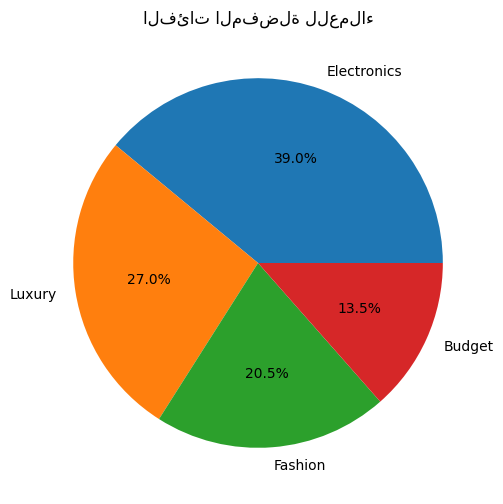

In [32]:
# 5. الفئات المفضلة Preferred Category
# رسم دائري
category_counts = df["Preferred Category"].value_counts()
print("\nالفئات المفضلة للعملاء:")
print(category_counts)

category_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6), title="الفئات المفضلة للعملاء")
plt.ylabel("")
plt.show()